<a href="https://colab.research.google.com/github/FranzDS01/InteligenciaArtifical/blob/main/Redes%20neuronales/Algoritmos_Geneticos_Optimizacion_de_riego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algortimos Geneticos

**Nombre:**  Soria Colque Franz Ronald

**Carrrera:** Ingenieria de Sistemas

**Repositorio:**  [Repositorio Github](https://)

**Detalle del problema :** El objetivo del problema es maximizar la eficiencia del uso del agua para el riego de los cultivos. Esto implica seleccionar las áreas de cultivo que se van a regar y la cantidad de agua que se va a utilizar para cada área, de manera que se satisfagan las necesidades de agua de los cultivos mientras se minimiza el desperdicio de agua.    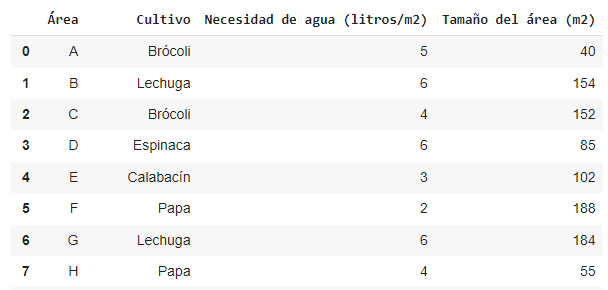


**Detalles de la solucion :**

Para resolver este problema, estás utilizando un algoritmo genético. Un algoritmo genético es un algoritmo de búsqueda heurística que utiliza técnicas inspiradas en la evolución natural, como la selección, el cruce y la mutación, para encontrar soluciones a problemas de optimización. En el contexto de tu problema, una solución es una combinación de áreas de cultivo y cantidades de agua que maximiza la eficiencia del uso del agua para el riego.

El algoritmo genético comienza con una población inicial de soluciones aleatorias y luego aplica los operadores de selección, cruce y mutación para generar nuevas soluciones en cada generación. El proceso se repite hasta que se alcanza un criterio de parada, como un número máximo de generaciones o una solución lo suficientemente buena.

Para el la creacion de los nuevos individuos se esta implementado la funcion de cruce uniforme `Este método de cruce implica recorrer cada gen de los cromosomas y seleccionar aleatoriamente el gen del primer o segundo cromosoma con igual probabilidad para agregar a los nuevos cromosomas resultantes.`

Las funciones *decodifica_asignacion_agua()* y *fitness_asignacion_agua()* trabajan juntas para decodificar un cromosoma en una asignación de agua para cada área de cultivo y calcular el valor de aptitud para el cromosoma en función de la cantidad total de agua utilizada para regar las áreas seleccionadas.


Para los datos de entrada se esta creando una conjunto de datos como las que estan en la imagen , de las cuales se estan usando las columnas "Necesidad de agua (litros/m2)" y  "Tamaño del área (m2)"  con esta parte del codigo

**Nesesidad_agua = data[:25,2:3]**
**area = data[:25,3]**

El cromosoma tiene 25 genes

**Para el algoritmo genético se esta usando los siguientes parámetros:**

Número de participantes en los torneos de selección: 50

Tipo de problema: Maximización (maximizar el uso del agua)

Número de generaciones: 60 , el algoritmo encuentra la solucion en la generacion 19


Tamaño de la población: 100 individuos en cada generación

Porcentaje de la población elegida como padres: 40%

Probabilidad de mutación: 2.5%.

Y el ultimo atributo data para visualizar la solución en términos de los cultivos seleccionados y la cantidad de agua utilizada por cada una .

algoritmo_genetico_t(genetico, 100, max, 20, 100, 0.4, 0.025,data)





In [311]:
import random
import pandas as pd

In [312]:
class Problema_Genetico(object):
    # Constructor
    def __init__(self, genes, fun_decodificar, fun_cruzar, fun_mutar, fun_fitness, longitud_individuos):
        self.genes = genes
        self.fun_decodificar = fun_decodificar
        self.fun_cruzar = fun_cruzar
        self.fun_mutar = fun_mutar
        self.fun_fitness = fun_fitness
        self.longitud_individuos = longitud_individuos

    def decodificar(self, genotipo):
        #Devuelve el fenotipo a partir del genotipo
        fenotipo = self.fun_decodificar(genotipo)
        return fenotipo

    def cruzar(self, cromosoma1, cromosoma2):
        #Devuelve el cruce de un par de cromosomas
        cruce = self.fun_cruzar(cromosoma1, cromosoma2)
        return cruce

    def mutar(self, cromosoma, prob):
        #Devuelve el cromosoma mutado
        mutante = self.fun_mutar(cromosoma, prob)
        return mutante

    def fitness(self, cromosoma):
        #Función de valoración
        valoracion = self.fun_fitness(cromosoma)
        return valoracion

In [313]:
def fun_cruzar(cromosoma1, cromosoma2):
    #Cruce uniforme
    # Asegurarse de que los cromosomas tengan la misma longitud
    assert len(cromosoma1) == len(cromosoma2)

    # Crear dos nuevos cromosomas vacíos
    cruce1 = []
    cruce2 = []

    # Recorrer cada gen de los cromosomas
    for gen1, gen2 in zip(cromosoma1, cromosoma2):
        # Seleccionar aleatoriamente el gen del primer o segundo cromosoma
        if random.random() < 0.5:
            cruce1.append(gen1)
            cruce2.append(gen2)
        else:
            cruce1.append(gen2)
            cruce2.append(gen1)

    return [cruce1, cruce2]

def fun_mutar(cromosoma, prob):
    # Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob
    l = len(cromosoma)
    p = random.randint(0, l - 1)
    if prob > random.uniform(0, 1):
        cromosoma[p] =  (cromosoma[p] + 1) % 2
    return cromosoma

def poblacion_inicial(problema_genetico, size):
    l = []
    for i in range(size):
        l.append([random.choice(problema_genetico.genes) for i in range(problema_genetico.longitud_individuos)])
    return l

def cruza_padres(problema_genetico, padres):
    l = []
    l1 = len(padres)
    while padres != []:
        l.extend(problema_genetico.cruzar(padres[0], padres[1]))
        padres.pop(0)
        padres.pop(0)
    return l

def muta_individuos(problema_genetico, poblacion, prob):
    return [problema_genetico.mutar(x, prob) for x in poblacion]

def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion, k)
        seleccionado = opt(participantes, key = problema_genetico.fitness)
        seleccionados.append(seleccionado)
    return seleccionados

def nueva_generacion_t(problema_genetico, k, opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k, opt)
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2 + cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

def algoritmo_genetico_t(problema_genetico, k, opt, ngen, size, prop_cruces, prob_mutar,data):
    poblacion = poblacion_inicial(problema_genetico, size)
    print("Poblacion Inicial")
    print(poblacion)
    n_padres = round(size * prop_cruces)
    n_padres = int (n_padres if n_padres % 2 == 0 else n_padres - 1)
    n_directos = size - n_padres
    for i in range(ngen):
        poblacion = nueva_generacion_t(problema_genetico, k, opt, poblacion, n_padres, n_directos, prob_mutar)
        print("Nueva población",i)
        print(poblacion)
    mejor_cr = opt(poblacion, key = problema_genetico.fitness)
    mejor = problema_genetico.decodificar(mejor_cr)
    print("-----"*20)
    print("Solucion",mejor,problema_genetico.fitness(mejor_cr))
    print("-----"*20)
    for i,value in enumerate(mejor):
       if(value==1):
          print(f"{data[i,1:2]}{data[i,2:3]*data[i,3]}", end=" ")
       else:
          print(f"{value}", end=" ")


In [314]:
def decodifica_asignacion_agua(cromosoma, areas, necesidades_agua,capacidad_sistema_riego):
    #crea una lista de 0 y 1  en funcion al cromosoma , agrega 1 a la lista si
    # el gen del cromosoma es =1  y la cantidad de agua no se exede  la capacidad del sistema de riego
    #agrega 0 la lista si gen del cromosoma es = 0  o si la cantidad de agua es mayor a la capacidada del sistema de riego

    asignacion_agua = []
    cantidad_agua=0
    for i in range(len(areas)):
        if cromosoma[i] == 1 and cantidad_agua+area[i]*necesidades_agua[i]<= capacidad_sistema_riego :
            asignacion_agua.append(1)
            cantidad_agua = cantidad_agua+area[i]*necesidades_agua[i]
        elif cromosoma[i]==0 or cantidad_agua+area[i]*necesidades_agua[i]> capacidad_sistema_riego :
            asignacion_agua.append(0)
    return asignacion_agua

def fitness_asignacion_agua(cromosoma, areas,necesidades_agua, capacidad_sistema_riego):
    #Usa la funcion de decodifica_asignacion_agua() y suma la cantidad de agua ocupada por cada cromosoma
    objeto_riego=decodifica_asignacion_agua(cromosoma,areas,necesidades_agua,capacidad_sistema_riego)
    fittness=0
    for i in range(len(areas)):
      if objeto_riego[i] == 1:
        fittness += areas[i]*necesidades_agua[i]
    return fittness

Preparacion del problema

In [315]:
random.seed(0)
# Crear un DataFrame vacío con las columnas deseadas
data = pd.DataFrame(columns=['Área', 'Cultivo', 'Necesidad de agua (litros/m2)', 'Tamaño del área (m2)'])

# Agregar datos
cultivos = ['Maíz', 'Trigo', 'Arroz', 'Soja','Papa', 'Yuca', 'Tomate', 'Zanahoria','Lechuga', 'Cebolla', 'Ajo', 'Espinaca', 'Brócoli',
            'Coliflor', 'Pimiento', 'Berenjena', 'Calabacín', 'Pepino','Cilantro', 'Algodón'
            ,"Remolacha roja", "Nuez de areca", "Pimienta negra"]
for i in range(26):
    area = chr(ord('A') + i)
    cultivo = random.choice(cultivos)
    necesidad_agua = random.randint(2,6)
    tamano_area = random.randint(30,200)

    new_row = pd.DataFrame({'Área': [area],
                            'Cultivo': [cultivo],
                            'Necesidad de agua (litros/m2)': [necesidad_agua],
                            'Tamaño del área (m2)': [tamano_area]})

    data = pd.concat([data, new_row], ignore_index=True)
data

,Área,Cultivo,Necesidad de agua (litros/m2),Tamaño del área (m2)
0,A,Brócoli,5,40
1,B,Lechuga,6,154
2,C,Brócoli,4,152
3,D,Espinaca,6,85
4,E,Calabacín,3,102
5,F,Papa,2,188
6,G,Lechuga,6,184
7,H,Papa,4,55
8,I,Arroz,4,150
9,J,Pepino,2,120


In [316]:
import numpy as pd
data=data.to_numpy()
Nesesidad_agua = data[:25,2:3]
area = data[:25,3]
#print(Nesesidad_agua)
#print("---"*10)
#print(area)

In [319]:

capacidad_sistema_riego=5000
def fitness(cromosoma):
  v= fitness_asignacion_agua(cromosoma,area,Nesesidad_agua,capacidad_sistema_riego)
  return v
def decodificacion(cromosoma):
  v=decodifica_asignacion_agua(cromosoma,area,Nesesidad_agua,capacidad_sistema_riego)
  return v
genetico = Problema_Genetico([0,1], decodificacion, fun_cruzar, fun_mutar, fitness, len(area))

# Argumentos de entrada:
# * problema_genetico: una instancia de la clase Problema_Genetico, con el
#   problema de optimización que se quiere resolver.
# * k: número de participantes en los torneos de selección.
# * opt: max ó min, dependiendo si el problema es de maximización o de
#   minimización.
# * ngen: número de generaciones (condición de terminación)
# * tamaño (size): número de individuos en cada generación
# * prop_cruces: proporción del total de la población que serán padres.
# * prob_mutar: probabilidad de realizar una mutación de un gen.
algoritmo_genetico_t(genetico, 60, max, 20, 100, 0.4, 0.025,data)

Poblacion Inicial
[[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,